# Polynomial Regression

In [1]:
#Generate a Dummy dataset
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

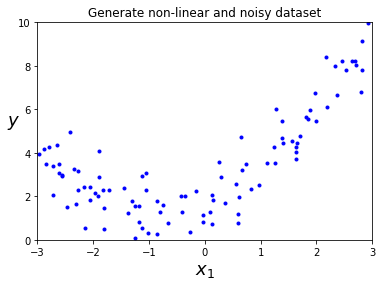

In [4]:
#Visualise the dataset
import matplotlib.pyplot as plt 

#----Plot the data------
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("Generate non-linear and noisy dataset")
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
nomialFeatures class to transform our training data, adding the square (2nd-degree
polynomial) of each feature in the training set as new features (in this case there is
just one feature):

In [5]:
#import
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

X[0],X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

X_poly now contains the original feature of X plus the square of this feature. Now you
can fit a LinearRegression model to this extended training data

In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_poly,y)

linear_reg.intercept_,linear_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

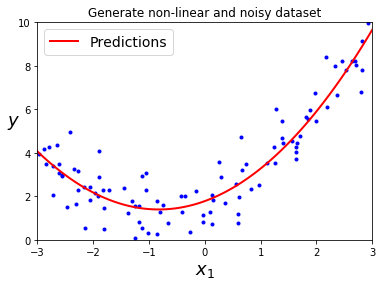

In [7]:
#Create a new Dataset
X_new=np.linspace(-3, 3, 100).reshape(100, 1)

#Transform the dataset
X_new_poly = poly_features.transform(X_new)

#Make predictions
y_new = linear_reg.predict(X_new_poly)

#Plot the curve
plt.plot(X, y, "b.")

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.title("Generate non-linear and noisy dataset")
plt.show()

PolynomialFeatures(degree=d) transforms an array containing n
features into an array containing (n + d)!/(d! n!) features.
When there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression
model cannot do). This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree. For example, if there were two features a and b, PolynomialFeatures with degree=3 would not only add the
features a^2,a^3,b^2, and b^3 but also the combinations ab, a^2b, and ab^2.


### Using High Degree Polynomial

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

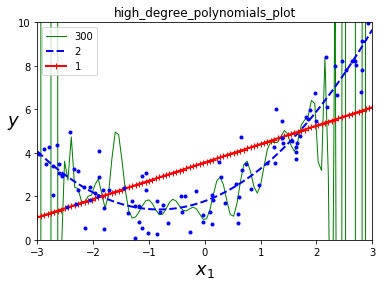

In [9]:
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    
    #Initialising 
    polynomial_features = PolynomialFeatures(degree = degree,include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    #Creating a Pipeline
    polynomial_pipeline = Pipeline([
        ("poly_features",polynomial_features),
        ("std_scaler",std_scaler),
        ("lin_reg",lin_reg)
    ])
    
    polynomial_pipeline.fit(X,y)
    y_new_pred = polynomial_pipeline.predict(X_new)
    plt.plot(X_new,y_new_pred,style,label=str(degree),linewidth = width)
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("high_degree_polynomials_plot")
plt.show()

Of course, this high-degree Polynomial Regression model is severely overfitting the
training data, while the linear model is underfitting it. 

## Learning curves

These are plots of the model’s performance on the training set and the validation set as a function of the training set size.
To generate the plots, simply train the model several times on different sized subsets
of the training set.

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    #Splitting the dataset
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    #Plot the curve
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

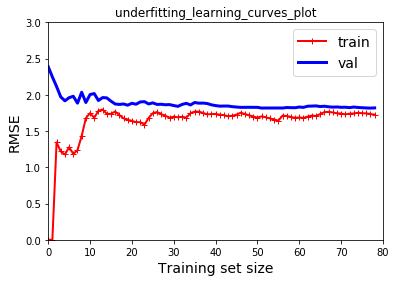

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.title("underfitting_learning_curves_plot")   # not shown
plt.show()                                      

When there are just one or two instances in the training set, the model can fit
them perfectly, which is why the curve starts at zero. But as new instances are added
to the training set, it becomes impossible for the model to fit the training data per‐
fectly, both because the data is noisy and because it is not linear at all. So the error on
the training data goes up until it reaches a plateau, at which point adding new instan‐
ces to the training set doesn’t make the average error much better or worse.

When the model is
trained on very few training instances, it is incapable of generalizing properly, which
is why the validation error is initially quite big. Then as the model is shown more
training examples, it learns and thus the validation error slowly goes down. However,
once again a straight line cannot do a good job modeling the data, so the error ends
up at a plateau, very close to the other curve.

####  let’s look at the learning curves of a 10th-degree polynomial model on the same data

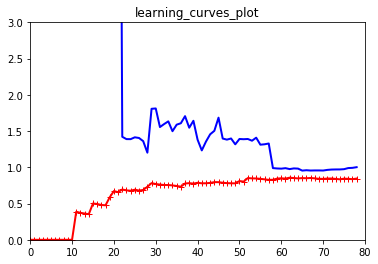

In [29]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
plot_learning_curve(polynomial_pipeline,X,y)
plt.axis([0, 80, 0, 3])
   
plt.title("learning_curves_plot")  
plt.show()                        

* The error on the training data is much lower than with the Linear Regression
model.
* There is a gap between the curves. This means that the model performs signifi‐
cantly better on the training data than on the validation data, which is the hall‐
mark of an overfitting model. However, if you used a much larger training set,
the two curves would continue to get closer